In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [63]:
df = pd.read_csv("50_Startups.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [64]:
df.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA - Exploratory Data Analysis

Find Expected Profit based on the company's data. 

- profit = ± b1 * RDSpend , ± b2 * Admin , ± b3 * MS, ± b4 State   

    ± b1 * RDSpend , ± b2 * Admin , ± b3 * MS, ± b4 State  -> All These are Columns/Attributes/Dimensions/Features/Predictors/Independant

     b1,b2,b3,b4 are -> coefficients

     profit is -> Target/Dependant/

- plot all types of graphs

- find correlation

In [65]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [66]:
target = 'Profit'
cols = ['RDSpend', 'Administration', 'MarketingSpend','Profit'	]
df[cols].corr()[target]

RDSpend           0.977401
Administration    0.200717
MarketingSpend    0.747434
Profit            1.000000
Name: Profit, dtype: float64

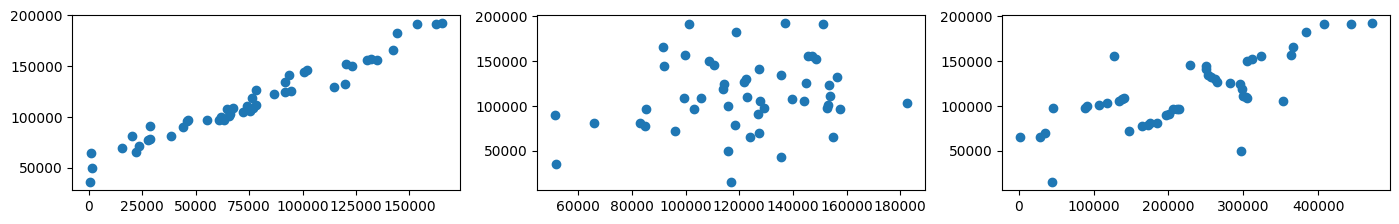

In [67]:
plt.figure(figsize=(23,5))

# subplot(nrows,ncols,index)
plt.subplot(2,4,1)
plt.scatter(df['RDSpend'],df['Profit'])

plt.subplot(2,4,2)
plt.scatter(df['Administration'],df['Profit'])

plt.subplot(2,4,3)
plt.scatter(df['MarketingSpend'],df['Profit'])

plt.show()

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
# density plot
plt.hist(df['Profit'],density=True)
plt.show()

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(3,2,1)
sns.kdeplot(df['RDSpend'])

plt.subplot(3,2,2)
sns.kdeplot(df['MarketingSpend'])

plt.subplot(3,2,5)
sns.kdeplot(df['Administration'])

plt.subplot(3,2,6)
sns.kdeplot(df['Profit'])

In [ ]:
# fill na values for RDSpend and MarketingSpend
df['RDSpend'] = df['RDSpend'].fillna(df['RDSpend'].mean().round(2))
df['MarketingSpend'] = df['MarketingSpend'].fillna(df['MarketingSpend'].mean().round(2))
df.isna().sum()

In [ ]:
# find outliers
plt.figure(figsize=(5,3))
plt.boxplot(df['MarketingSpend'], vert=False)
plt.show()

# Label Encoding

 - Process to assign a number to a text is label encoding.
   
 - Ordinal Data (Order matters): Use Label Encoding.

 - Nominal Data (No order): Use One-Hot Encoding.

In [ ]:
x = df.iloc[:, [0,1,2]].values
y = df.iloc[:, [4]].values
print(x.shape, y.shape)

In [ ]:
model = LinearRegression()
model.fit(x,y)

In [ ]:
x = df.iloc[:,[0,1,2,3]].values   # OR  [:[:-1]]
y = df.iloc[:,4].values           # OR  [:, -1]
print(x.shape, y.shape)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer([
                        ('ohe', OneHotEncoder(),[3])
                       ], 
                        remainder='passthrough'
                      )
x_trans = ct.fit_transform(x)
x_trans[:5]  # print first 5 rows


it has internally done label encoding on State's values

like :  New York   = 1

        California = 2
        
        Florida    = 3

and created 3 separate columns from the column that we passed to the OHE. 

so when it got New York as State it made 1.0 in the column 1 and 0.0 in both 2nd and 3rd column,

likewise

* Train Test Splits

    y_test is actual outputs

    y_hat is predicted outputs

    so to get cuuracy score we have to compare those two


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x_trans, y, test_size = 0.2, random_state=1)

print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

Random state is used when we have to replicate the result, it ensures the same 80% of data should be taken when same random state is given to it.

So when we repeatedly split the data we get same values for train-test-split, this ensures the same result everytime.

It acts like seed for random selection.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(xtrain,ytrain)
yhat = model.predict(xtest)
print(yhat)
yhat.shape

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [ ]:
mean_squared_error(ytest,yhat)

In [ ]:
root_mean_squared_error(ytest,yhat)

If the values in the data are so big > 4-5 digits then the magnitude of that data affects mean_squared_error

that's why we find r_squared_score

which is also called as coeff of determination

   R2 = 1 - (RSS / TSS)

It tells you how much of the variance in the  data is explained.

ex. 0.8 means 80% variance of data explained by model.

we can take it as an accuracy percentage

if this is negative then the model is terrible.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(ytest,yhat)

# Feature Engineering

In [ ]:
target = 'Profit'
cols = ['RDSpend', 'Administration', 'MarketingSpend', 'Profit']
df[cols].corr()[target]

 Here, we can not check correlation of state with profit because state has categorical values and profit is numerical.

 So we have to do feature engineering.

In [ ]:
from scipy.stats import f_oneway

In [ ]:
grpState = df.groupby(by='State')['Profit']   # if we don't pass profit, then we'll get info of all columns
grpState.describe()

In [ ]:
p = f_oneway(*grpState.apply(list))[1]

if p > 0.05 : 
    print("Accept Null Hypothesis (H0) of ANOVA , means no correlation")
else : 
    print("Reject Null Hypothesis H0, Alternate Hypothesis is there, There is correlation")

    

# Now check if Administration has any relation with profit


In [136]:
df2 = pd.read_csv('50_Startups.csv')

In [137]:
df2.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [138]:
df2.isna().sum()

RDSpend           2
Administration    0
MarketingSpend    3
State             0
Profit            0
dtype: int64

In [141]:
df2.dropna(inplace=True)
df2.isna().sum()

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [142]:
x = df2.iloc[:,[0,2]].values   # OR  [:[:-1]]
y = df2.iloc[:,4].values           # OR  [:, -1]
print(x.shape, y.shape)

(46, 2) (46,)


In [143]:
df2[['RDSpend','MarketingSpend','Profit']].corr()['Profit']

RDSpend           0.977703
MarketingSpend    0.732277
Profit            1.000000
Name: Profit, dtype: float64

In [144]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 90)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(36, 2) (10, 2) (36,) (10,)


In [145]:
model2 = LinearRegression()
model2.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [146]:
yhat = model2.predict(xtest)
yhat

array([162181.82117151, 112990.29090392,  65050.98819624,  69666.02525086,
       132012.30319388, 119144.30655515,  64281.9859036 , 104321.20551903,
       113914.90451526, 159595.14069184])

In [147]:
r2_score(ytest,yhat)

0.9657225697741437


# Saving the model

use pickle library

In [150]:
import pickle as pk

Below is an Example : 


In [152]:
f = open('test.pkl', 'wb')
pk.dump("test1",f)
pk.dump("test2",f)
pk.dump("test3",f)
f.close()

In [155]:
f = open("test.pkl", 'rb')
pk.load(f)

'test1'

In [156]:
pk.load(f)

'test2'

In [157]:
pk.load(f)

'test3'

 pk.load(f) it will give end of file error, so we have to use try catch